In [2]:
1+1

2

In [3]:
# increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Inspiration for code:

- https://developers.google.com/machine-learning/guides/text-classification/
- https://github.com/google/eng-edu/blob/master/ml/guides/text_classification/load_data.py

In [4]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import random
import time
import pickle

import numpy as np
import pandas as pd

from importlib import reload

import scipy.sparse

In [62]:
from helpers import load_data
from helpers import explore_data
from helpers import preprocess_data
from helpers import train_model

## Load the data

In [6]:
pwd

'/home/fbm221/W266FinalProject/Code'

In [7]:
data_path = '/home/fbm221/W266FinalProject/Data'

In [8]:
reload(load_data)
all_speech_ids, all_speeches = load_data.load_speech_data(data_path)


File speeches_097.txt has 48234496 characters
and 42332 speeches

Speeches list has 42332 speeches

File speeches_098.txt has 26214400 characters
and 23022 speeches

Speeches list has 65354 speeches

File speeches_099.txt has 25165824 characters
and 17636 speeches

Speeches list has 82990 speeches

File speeches_100.txt has 25165824 characters
and 18302 speeches

Speeches list has 101292 speeches

File speeches_101.txt has 25165824 characters
and 16470 speeches

Speeches list has 117762 speeches

File speeches_102.txt has 25165824 characters
and 16522 speeches

Speeches list has 134284 speeches

File speeches_103.txt has 25165824 characters
and 20033 speeches

Speeches list has 154317 speeches

File speeches_104.txt has 25165824 characters
and 25778 speeches

Speeches list has 180095 speeches

File speeches_105.txt has 25165824 characters
and 17084 speeches

Speeches list has 197179 speeches

File speeches_106.txt has 25165824 characters
and 18316 speeches

Speeches list has 215495 sp

In [9]:
len(all_speech_ids), len(all_speeches)

(462659, 462659)

## Create target labels

In [16]:
# OPEN descr FROM A SAVED FILE (if it was previously saved)
outdata_path = '/home/fbm221/W266FinalProject/Data'
#descr = pickle.load(open(os.path.join(outdata_path, 'descr.p'), 'rb'))

In [11]:
#len(descr)

In [12]:
reload(load_data)
start_time = time.time()
# taking a 30% sample of the full description file
descr = load_data.load_descr_data('/home/fbm221/W266FinalProject/Data/full_descr.txt')
print("\nIt took {0:.1f} seconds to create the dictionary".format(time.time()-start_time))

2906043 lines have been read
36352 keys had duplicates and deleted
The dictionary has 2803420 keys

Random congressperson: 1090182100
date 20061114
char_count 278
word_count 49
speakerid 109112991.0
Party R
Congress 109
Chamber S
State TN
Ethnicity W
Age 54.0
Age_lt_med 1.0
NonWhite 0.0
Female 0.0
speaker Mr. FRIST
Full Name FRIST, WILLIAM
match exact
check 1

It took 21.9 seconds to create the dictionary


In [13]:
# check if sampling worked
len(list(descr.keys()))/2914464

0.9618989975515223

In [14]:
ethnicity = load_data.create_target_labels(all_speech_ids, descr)[1]
len(ethnicity)

462659

### Save descr dictionary

In [17]:
pickle.dump(descr, open(os.path.join(outdata_path, 'descr.p'), 'wb'))

### Data QA

In [18]:
explore_data.get_counts(ethnicity)

,Category,Count
0,-1,135139
1,0,293987
2,1,33533


In [19]:
reload(explore_data)
explore_data.random_speech(all_speeches, all_speech_ids, ethnicity, descr)

Speaker information
date 20150429
char_count 101
word_count 18
speakerid 114120190.0
Party D
Congress 114
Chamber H
State CA
Ethnicity B
Age 70.0
Age_lt_med 0.0
NonWhite 1.0
Female 1.0
speaker Ms. JACKSON LEE
Full Name LEE, BARBARA
match exact
check 1

Mr. Chairman. I have an amendment at the desk. The Acting CHAIR. The Clerk will report the amendment.


# Ethnicity Model

## Split into train, validate, test

In [20]:
reload(preprocess_data)
train, train_ids, train_target, val, val_ids, val_target, test, test_ids, test_target = preprocess_data.split_train_val_test(all_speeches, all_speech_ids, ethnicity, descr)

Training split: 14140 ones and 14140 zeroes
Training speech list size: 28280
Training target list size: 28280
Validation split: 4713 ones and 4713 zeroes
Validation speech list size: 9426
Validation target list size: 9426
Test split: 4714 ones and 4714 zeroes
Test speech list size: 9428
Test target list size: 9428


In [21]:
sum(train_target), sum(val_target), sum(test_target)

(14140, 4713, 4714)

In [22]:
# number of speeches under 30 words
sum(np.array(ethnicity)==1) - (sum(train_target) + sum(val_target) + sum(test_target))

9966

In [23]:
# random speech from a train set where gender=1
explore_data.random_speech(train, train_ids, train_target, descr)

Speaker information
date 20160621
char_count 1165
word_count 192
speakerid 114123100.0
Party D
Congress 114
Chamber H
State MI
Ethnicity B
Age 62.0
Age_lt_med 0.0
NonWhite 1.0
Female 1.0
speaker Mrs. LAWRENCE
Full Name LAWRENCE, BRENDA
match exact
check 1

Mr. Speaker. I yield myself such time as I may consume. Mr. Speaker. I rise in support of H.R. 4902. a bipartisan bill sponsored by some of my colleagues on the Oversight and Government Reform Committee. Representatives HURD. CONNOLLY. and LUJAN GRISHAM. I thank them for their good work on this important legislation. This legislation would establish a uniform pay system for law enforcement officers of the Customs and Border Protections Air and Marine Operations. who are currently paid overtime pay under three different systems. and it will make it more efficient for the agency to administer staff overtime. The bill will convert the pay system for AMO officers to Law Enforcement Availability Pay. a system used by many other Federal ag

#### Cleanup

In [24]:
%whos

Variable          Type        Data/Info
---------------------------------------
HTML              type        <class 'IPython.core.display.HTML'>
absolute_import   _Feature    _Feature((2, 5, 0, 'alpha<...>0, 0, 'alpha', 0), 16384)
all_speech_ids    list        n=462659
all_speeches      list        n=462659
data_path         str         /home/fbm221/W266FinalProject/Data
descr             dict        n=2803420
display           function    <function display at 0x7f7d269e61e0>
division          _Feature    _Feature((2, 2, 0, 'alpha<...> 0, 0, 'alpha', 0), 8192)
ethnicity         list        n=462659
explore_data      module      <module 'helpers.explore_<...>helpers/explore_data.py'>
load_data         module      <module 'helpers.load_dat<...>de/helpers/load_data.py'>
np                module      <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
os                module      <module 'os' from '/home/<...>da3/lib/python3.6/os.py'>
outdata_path      str         /home/fbm221/W266Fi

In [25]:
del all_speech_ids

In [26]:
del all_speeches

In [27]:
del ethnicity

## EDA on train data

Source: https://developers.google.com/machine-learning/guides/text-classification/step-2

### Check median number of words per sample in train/val/test

In [28]:
reload(explore_data)

<module 'helpers.explore_data' from '/home/fbm221/W266FinalProject/Code/helpers/explore_data.py'>

In [29]:
explore_data.get_num_words_per_sample(train)

253.0

In [30]:
explore_data.get_num_words_per_sample(val)

256.0

In [31]:
explore_data.get_num_words_per_sample(test)

253.5

Speech length percentiles
    0     10    20     30     40     50     60     70     80     90       100
0  31.0  48.0  89.0  146.0  195.0  253.0  330.0  424.0  578.0  860.0  21422.0


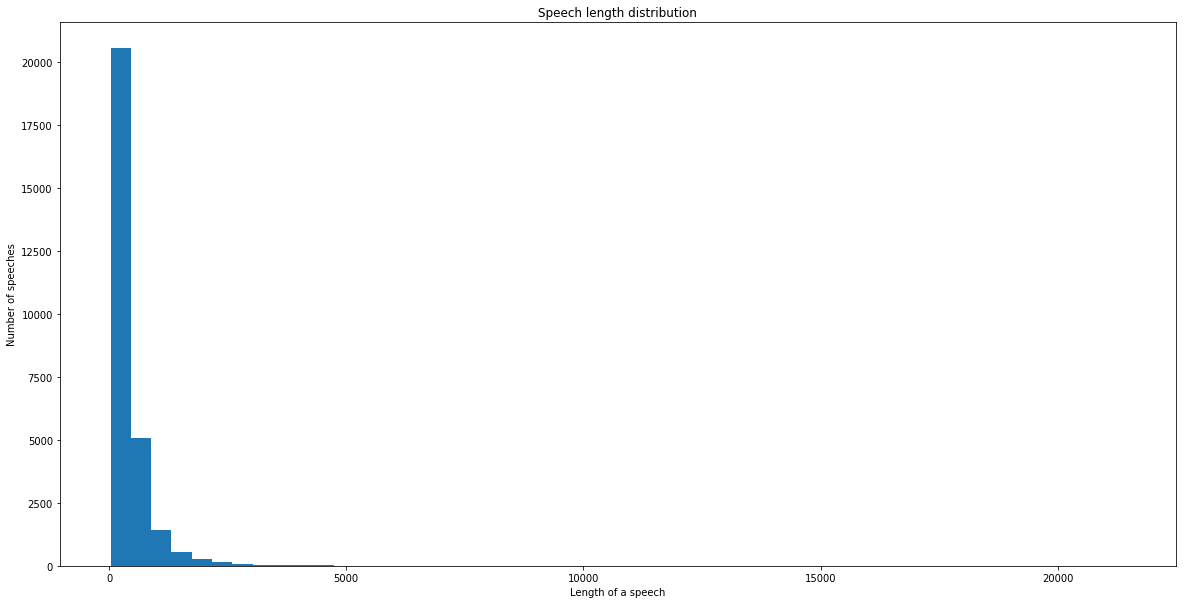

In [32]:
explore_data.plot_sample_length_distribution(train)

### Most popular unigrams (training only)

In [33]:
# take a sample to avoid running out of memory
train_sample = random.sample(train, int(len(train)*0.2))
len(train_sample)

5656

['the', 'to', 'of', 'and', 'in', 'that', 'is', 'for', 'this', 'we', 'it', 'on', 'have', 'are', 'as', 'be', 'not', 'our', 'with', 'will', 'by', 'mr', 'from', 'has', 'was', 'they', 'would', 'my', 'their', 'an', 'at', 'who', 'he', 'but', 'or', 'all', 'his', 'president', 'bill', 'do', 'which', 'people', 'speaker', 'these', 'been', 'what', 'you', 'more', 'there', 'so']


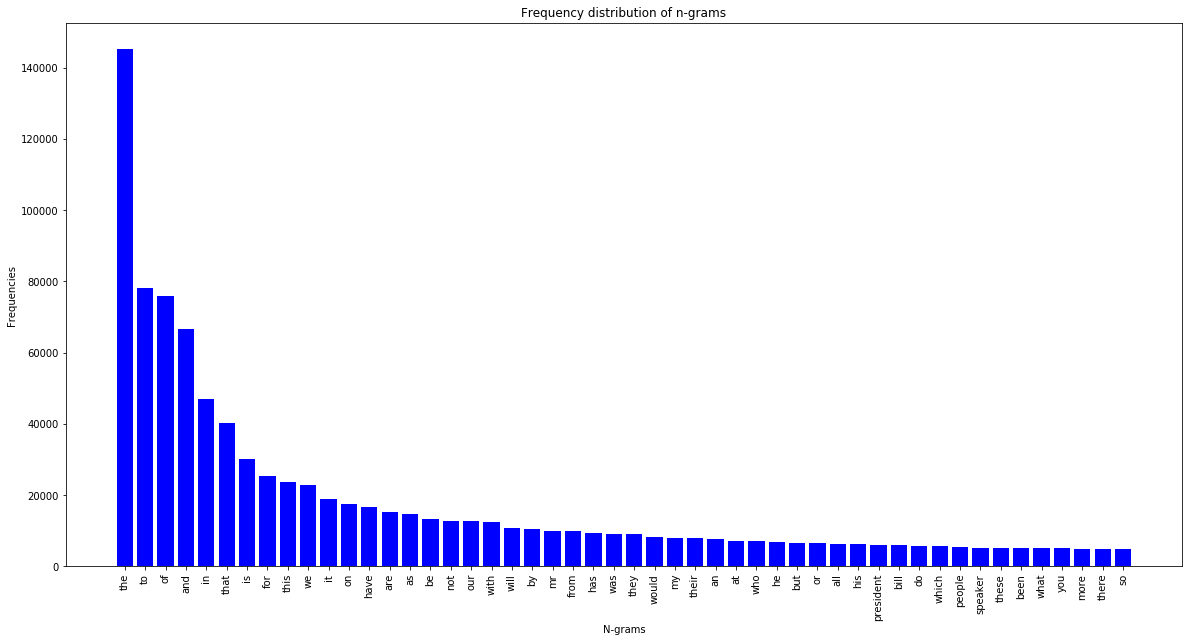

In [34]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(1,1))

### Most popular bigrams (training only)

['of the', 'in the', 'to the', 'it is', 'and the', 'on the', 'for the', 'mr speaker', 'that the', 'to be', 'we have', 'that is', 'we are', 'that we', 'by the', 'with the', 'the united', 'united states', 'of this', 'is the', 'mr president', 'will be', 'at the', 'in this', 'from the', 'of our', 'my colleagues', 'has been', 'going to', 'this bill', 'is not', 'want to', 'the senate', 'this is', 'have been', 'to do', 'the president', 'the american', 'there is', 'the house', 'the bill', 'they are', 'one of', 'as the', 'do not', 'would be', 'the federal', 'of my', 'to make', 'the gentleman']


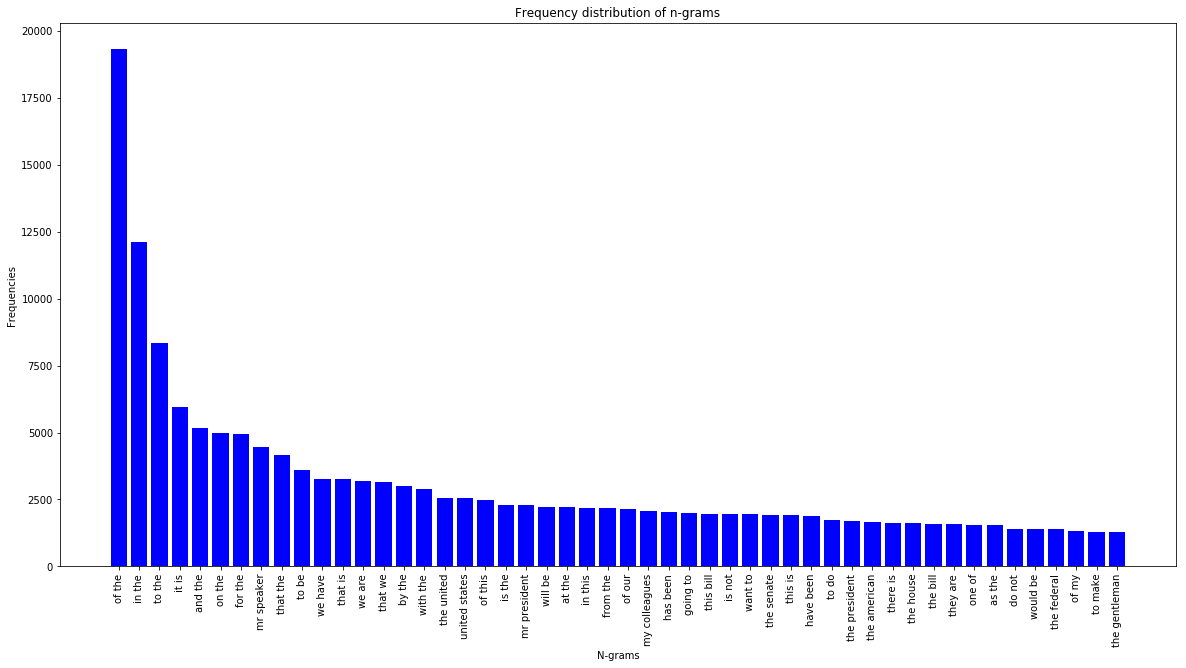

In [35]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(2,2))

### Most popular trigrams (training only)

#### Run this only on small samples

['the united states', 'one of the', 'the american people', 'my colleagues to', 'the gentleman from', 'are going to', 'of the united', 'would like to', 'the department of', 'mr speaker rise', 'we need to', 'be able to', 'urge my colleagues', 'the federal government', 'as well as', 'member of the', 'in the united', 'ask unanimous consent', 'we are going', 'rise today to', 'speaker rise today', 'in order to', 'it is not', 'that we have', 'unanimous consent that', 'there is no', 'that we are', 'the committee on', 'percent of the', 'the senator from', 'the fact that', 'the people of', 'of the senate', 'some of the', 'the balance of', 'of my time', 'is going to', 'part of the', 'men and women', 'in support of', 'balance of my', 'of the aisle', 'the state of', 'members of the', 'that is the', 'in this country', 'house of representatives', 'chairman of the', 'of the house', 'of my colleagues']


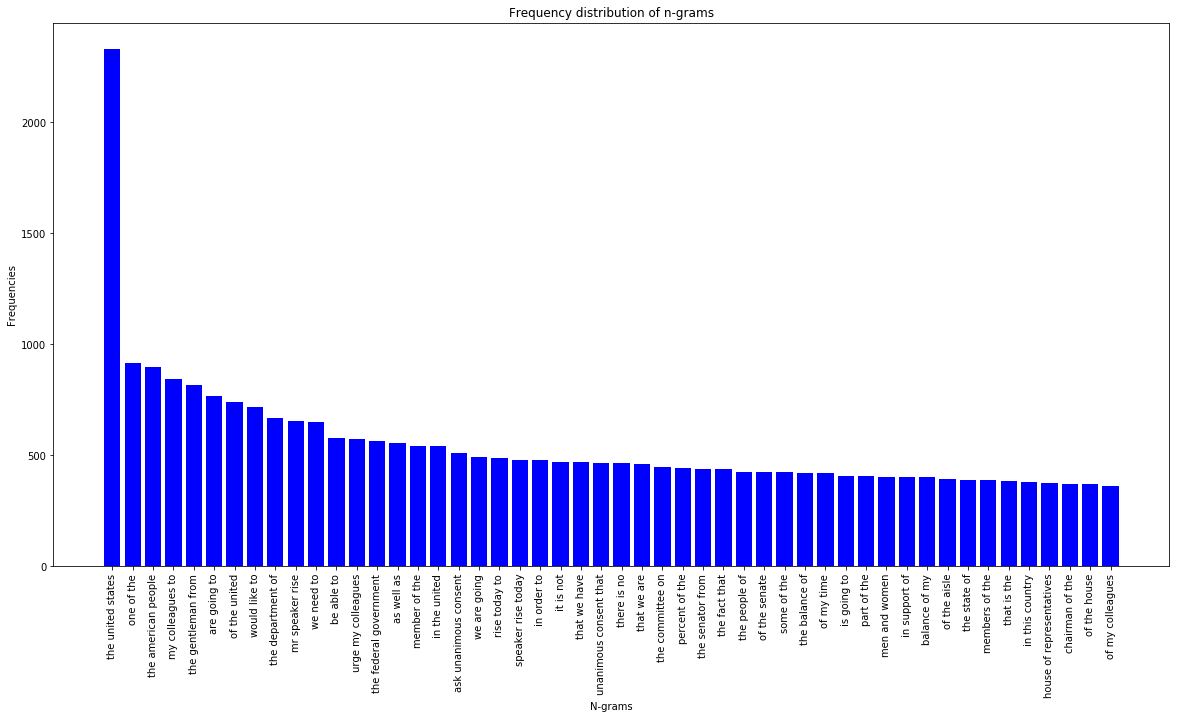

In [36]:
explore_data.plot_frequency_distribution_of_ngrams(train_sample, ngram_range=(3,3))

In [37]:
congress = set([str(i) for i in range(97,115)])

In [38]:
reload(explore_data)
explore_data.ngrams_by_category(train, train_ids, descr, congress, 'Congress', p=0.3, top_n=5)


For Congress 103 top 5 (3, 3) ngrams are:
the united states
are going to
one of the
the american people
my colleagues to
--------------------

For Congress 104 top 5 (3, 3) ngrams are:
balanced budget amendment
the american people
the balanced budget
the gentleman from
the united states
--------------------

For Congress 105 top 5 (3, 3) ngrams are:
the united states
one of the
balanced budget amendment
the balanced budget
the american people
--------------------

For Congress 106 top 5 (3, 3) ngrams are:
the united states
the gentleman from
one of the
be able to
are going to
--------------------

For Congress 100 top 5 (3, 3) ngrams are:
the united states
would like to
one of the
my colleagues to
of the united
--------------------

For Congress 109 top 5 (3, 3) ngrams are:
the united states
one of the
the gentleman from
are going to
mr speaker rise
--------------------

For Congress 101 top 5 (3, 3) ngrams are:
the united states
ask unanimous consent
unanimous consent that
of the sen

## N-gram model

Inspiration for code: https://developers.google.com/machine-learning/guides/text-classification/step-3

### Pre-processing

In [39]:
# Vectorization parameters
# Range (inclusive) of n-gram sizes for tokenizing text.
NGRAM_RANGE = (1, 2)

# Minimum corpus frequency below which a token will be discarded.
MIN_DOCUMENT_FREQUENCY = 5

# Maximum proportion of corpus containing a word above which a token will be discarded.
# Helps eliminate stop words
MAX_DOCUMENT_FREQUENCY = 0.7

# Limit on the number of features. We use the top 20K features.
TOP_K = 10000

# Output number of top/bottom scoring ngrams
TOP_N = 5

vec_params = {
    'ngram_range': NGRAM_RANGE,
    'min_df': MIN_DOCUMENT_FREQUENCY,
    'max_df': MAX_DOCUMENT_FREQUENCY,
    'top_k': TOP_K,
    'top_n': TOP_N
}

In [40]:
reload(preprocess_data)
train_vec, val_vec, test_vec = preprocess_data.ngram_vectorize(train, train_target, val, test, **vec_params)

Total vocabulary size: 243686
Number of stop words 1871364

Top 5 ngrams by differentiating score:
mr president 	 965.9
senator 	 961.2
speaker 	 709.8
president 	 650.7
mr speaker 	 565.5

Bottom 5 ngrams by differentiating score:
that arent 	 0.0
rightful owners 	 0.0
commission released 	 0.0
too because 	 0.0
the neediest 	 0.0


In [41]:
len(train), len(val), len(test)

(28280, 9426, 9428)

In [42]:
train_vec.shape, val_vec.shape, test_vec.shape

((28280, 10000), (9426, 10000), (9428, 10000))

### Saving processed files

In [43]:
pwd

'/home/fbm221/W266FinalProject/Code'

In [46]:
outdata_path = '/home/fbm221/W266FinalProject/saved_files/Ethnicity'

In [47]:
scipy.sparse.save_npz(os.path.join(outdata_path, 'train_vec.npz'), train_vec)
scipy.sparse.save_npz(os.path.join(outdata_path, 'val_vec.npz'), val_vec)
scipy.sparse.save_npz(os.path.join(outdata_path, 'test_vec.npz'), test_vec)

In [48]:
train_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'train_vec.npz'))
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))
test_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'test_vec.npz'))

In [49]:
val_vec = scipy.sparse.load_npz(os.path.join(outdata_path, 'val_vec.npz'))

In [50]:
train_vec.shape, val_vec.shape, test_vec.shape

((28280, 10000), (9426, 10000), (9428, 10000))

In [51]:
with open(os.path.join(outdata_path, 'train_list'), 'wb') as fp:
    pickle.dump(train, fp)
with open(os.path.join(outdata_path, 'train_ids'), 'wb') as fp:
    pickle.dump(train_ids, fp)
with open(os.path.join(outdata_path, 'train_target'), 'wb') as fp:
    pickle.dump(train_target, fp)
with open(os.path.join(outdata_path, 'val_list'), 'wb') as fp:
    pickle.dump(val, fp)
with open(os.path.join(outdata_path, 'val_ids'), 'wb') as fp:
    pickle.dump(val_ids, fp)
with open(os.path.join(outdata_path, 'val_target'), 'wb') as fp:
    pickle.dump(val_target, fp)
with open(os.path.join(outdata_path, 'test_list'), 'wb') as fp:
    pickle.dump(test, fp)
with open(os.path.join(outdata_path, 'test_ids'), 'wb') as fp:
    pickle.dump(test_ids, fp)
with open(os.path.join(outdata_path, 'test_target'), 'wb') as fp:
    pickle.dump(test_target, fp)

In [52]:
sum(train_target), sum(val_target), sum(test_target)

(14140, 4713, 4714)

In [53]:
with open(os.path.join(outdata_path, 'train_list'), 'rb') as fp:
    train = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_ids'), 'rb') as fp:
    train_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'train_target'), 'rb') as fp:
    train_target = pickle.load(fp)

In [54]:
with open(os.path.join(outdata_path, 'val_list'), 'rb') as fp:
    val = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_ids'), 'rb') as fp:
    val_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'val_target'), 'rb') as fp:
    val_target = pickle.load(fp)

In [55]:
sum(val_target), len(val_target)

(4713, 9426)

In [56]:
with open(os.path.join(outdata_path, 'test_list'), 'rb') as fp:
    test = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_ids'), 'rb') as fp:
    test_ids = pickle.load(fp)
with open(os.path.join(outdata_path, 'test_target'), 'rb') as fp:
    test_target = pickle.load(fp)

In [57]:
sum(train_target), sum(val_target), sum(test_target)

(14140, 4713, 4714)

### Model: Multi-Layer Perceptron (Vanilla NN)

In [59]:
logs_base_dir = "/home/fbm221/W266FinalProject/saved_files/Ethnicity"

In [60]:
ngram_model_params = {
    'model': 'ngram',
    'log_dir': logs_base_dir,
    'learning_rate': 1e-3,
    'epochs': 1000,
    'batch_size': 128,
    'layers': 2,
    'units': 64,
    'dropout_rate': 0.2
}

In [63]:
reload(train_model)
history, train_pred_probs, val_pred_probs = train_model.train_model(((train_vec, train_target), (val_vec, val_target)), **ngram_model_params)

Train on 28280 samples, validate on 9426 samples
Epoch 1/1000
 - 6s - loss: 0.5954 - acc: 0.7042 - val_loss: 0.5553 - val_acc: 0.7164
Epoch 2/1000
 - 5s - loss: 0.4867 - acc: 0.7686 - val_loss: 0.5290 - val_acc: 0.7390
Epoch 3/1000
 - 5s - loss: 0.4340 - acc: 0.8018 - val_loss: 0.5276 - val_acc: 0.7360
Epoch 4/1000
 - 5s - loss: 0.4038 - acc: 0.8160 - val_loss: 0.5318 - val_acc: 0.7362
Epoch 5/1000
 - 5s - loss: 0.3750 - acc: 0.8297 - val_loss: 0.5423 - val_acc: 0.7356
Validation accuracy: 0.7356248675524847, loss: 0.5423104726228647


In [65]:
np.save('/home/fbm221/W266FinalProject/saved_files/Ethnicity/val_pred_probs', val_pred_probs, allow_pickle=True, fix_imports=True)

## Model evaluation

In [66]:
val_preds = val_pred_probs > 0.5
np.sum(val_preds.flatten()==val_target)

6934

Confusion matrix, without normalization
[[3561 1152]
 [1340 3373]]


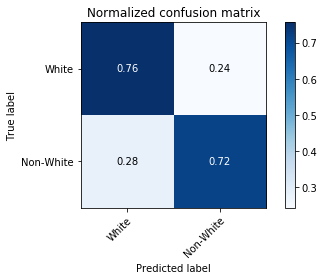

In [67]:
reload(explore_data)
# specify class names in 0 - 1 order
classes = ['White', 'Non-White']
explore_data.plot_confusion_matrix(val_target, val_preds, classes, normalize=True)

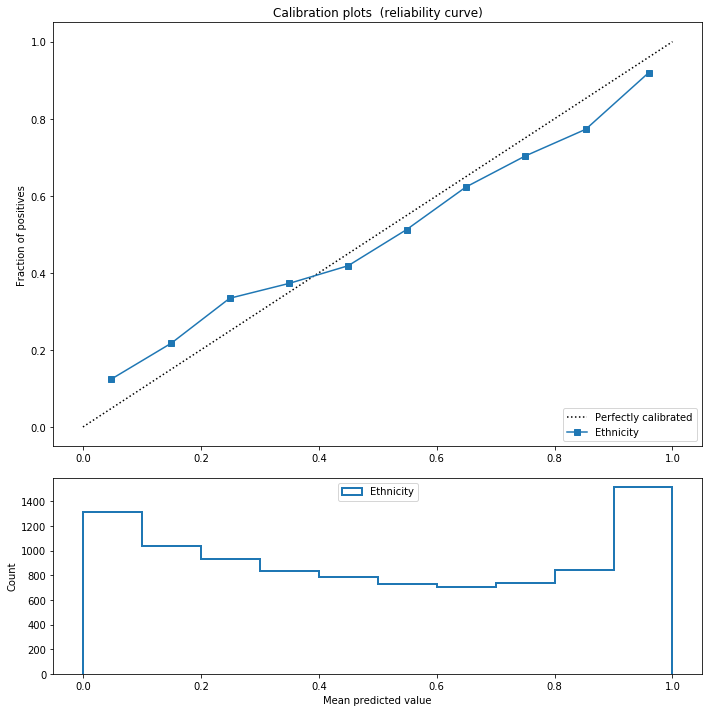

In [68]:
reload(explore_data)
explore_data.plot_calibration_curve(val_target, val_pred_probs, 'Ethnicity')

In [69]:
del train, train_ids, train_pred_probs, train_target, train_vec

In [70]:
with open(os.path.join(outdata_path, 'val_pred_probs'), 'wb') as fp:
    pickle.dump(val_pred_probs, fp)

In [71]:
with open(os.path.join(outdata_path, 'val_pred_probs'), 'rb') as fp:
    val_pred_probs = pickle.load(fp)

In [72]:
val_pred_probs.shape

(9426, 1)

In [74]:
descr_df = pd.read_csv('/home/fbm221/W266FinalProject/Data/full_descr.txt', sep="|", index_col=0)
descr_df = descr_df.loc[np.asarray(val_ids, dtype=int)]
descr_df.shape

/home/fbm221/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(9426, 16)

In [75]:
descr_df.head()

,date,char_count,word_count,speakerid,Party,Congress,Chamber,State,Ethnicity,Age,Age_lt_med,NonWhite,Female,speaker,Full Name,match
speech_id,,,,,,,,,,,,,,,,
970034678,19810521.0,3397.0,507.0,97112170.0,D,97.0,H,OH,B,57.0,0.0,1.0,0.0,Mr. STOKES,"STOKES, LOUIS",fuzzy
1140107584,20160712.0,3503.0,565.0,114121700.0,D,114.0,H,CA,B,78.0,0.0,1.0,1.0,Ms. MAXINE WATERS of California,"WATERS, MAXINE",exact
1140036275,20150617.0,985.0,168.0,114121750.0,D,114.0,H,FL,B,74.0,0.0,1.0,1.0,Ms. WILSON of Florida,"WILSON, FREDERICA",exact
1140062682,20151116.0,2802.0,528.0,114119300.0,D,114.0,H,MD,B,58.0,1.0,1.0,1.0,Ms. EDWARDS,"EDWARDS, DONNA",exact
1030014310,19930316.0,419.0,67.0,103112360.0,D,103.0,H,MO,B,63.0,0.0,1.0,0.0,Mr. CLAY,"CLAY, WILLIAM",fuzzy


In [76]:
reload(explore_data)
# checking the ratios of demo variables in low-mid-high probability buckets
explore_data.check_bin_probs_distr(val_pred_probs, 
                                   val_ids, 
                                   descr_df)

Validation sample means:
      Gender_F  Ethinicity_NW     AvgAge  Party_D  Chamber_H  AvgWordCount
base  0.205283            0.5  59.894229  0.68205    0.69478    408.802461


,Gender_F,Ethinicity_NW,AvgAge,Party_D,Chamber_H,AvgWordCount
0.4,0.48,0.49,0.99,0.79,0.71,1.09
0.6,0.92,0.93,1.00,0.99,1.13,0.87
1.0,1.60,1.58,1.01,1.24,1.26,0.96


In [77]:
reload(explore_data)
explore_data.compare_ngrams(val, val_pred_probs, ngram_range=(1, 2))


Top 10 ngrams by differentiating score:
mr president 	 247.1
speaker 	 170.1
senator 	 167.8
the senator 	 166.0
senator from 	 149.7
speaker rise 	 137.3
mr speaker 	 136.1
rise 	 113.8
the senate 	 105.6
president 	 102.3


bin,1,2,3
mr president,2642.0,383.0,665.0
mr speaker,2170.0,1235.0,4086.0
president,5740.0,1239.0,2595.0
rise,758.0,368.0,1325.0
senator,3084.0,301.0,389.0
senator from,879.0,38.0,39.0
speaker,2462.0,1419.0,4722.0
speaker rise,282.0,190.0,731.0
the senate,2039.0,404.0,541.0
the senator,915.0,36.0,33.0


#### Run the following test on a random subset of the validation sample

In [78]:
np.random.seed(100)
val_random = np.random.choice(a=[0,1], size=len(val_target), p = [0.9,0.1])
val_random.sum()/val_random.shape[0]

0.10142159983025674

In [79]:
val_sample, val_ids_sample, val_pred_probs_sample = [], [], []
for i in range(len(val_ids)):
    if val_random[i] == 1:
        val_sample.append(val[i])
        val_ids_sample.append(val_ids[i])
        val_pred_probs_sample.append(val_pred_probs[i])
len(val_sample), len(val_ids_sample), len(val_pred_probs_sample)

(956, 956, 956)

In [80]:
reload(explore_data)
explore_data.ngrams_by_bin(val_sample, val_pred_probs_sample)


In 0.4 bin top 10 ngrams:

the united states
are going to
of the united
one of the
the senator from
of the united states
the department of
the american people
we need to
the gentleman from
--------------------

In 0.6 bin top 10 ngrams:

the united states
one of the
the national debt
mr speaker rise
the american people
would like to
speaker rise today
my colleagues to
the gentleman from
the fairness doctrine
--------------------

In 1.0 bin top 10 ngrams:

the united states
my colleagues to
the american people
be able to
mr speaker rise
in the united
the gentleman from
one of the
in the united states
are going to
--------------------


In [81]:
reload(explore_data)
explore_data.print_mispredictions(val_target, val_pred_probs, val, val_ids, descr_df)


True positive (Predicted prob: 0.94):

date                                       2.01504e+07
char_count                                         188
word_count                                          32
speakerid                                  1.14122e+08
Party                                                D
Congress                                           114
Chamber                                              H
State                                               NM
Ethnicity                                            H
Age                                                 57
Age_lt_med                                           1
NonWhite                                             1
Female                                               1
speaker       Ms. MICHELLE LUJAN GRISHAM of New Mexico
Full Name                      LUJAN GRISHAM, MICHELLE
match                                            exact
Name: 1140022774, dtype: object

 Mr. Speaker. I ask unanimous consent to insert